In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
import sys
import pymatviz as pmv

In [2]:
from smact.utils import oxidation
from smact.utils.oxidation import ICSD24OxStatesFilter

ox_filter = ICSD24OxStatesFilter()
ox_states_df = ox_filter.ox_states_df
ox_states_df[18:37]

,element,oxidation_state,results_count
18,He,-9,0
19,He,-8,0
20,He,-7,0
21,He,-6,0
22,He,-5,0
23,He,-4,0
24,He,-3,0
25,He,-2,0
26,He,-1,0
27,He,0,29


In [3]:
count_df = ox_states_df.groupby("element")["results_count"].sum()
type(count_df)

pandas.core.series.Series

/Users/kinga/miniconda3/envs/smact_dev/lib/python3.10/site-packages/pymatviz/ptable/ptable_matplotlib.py:265: UserWarning: Elements dropped due to close to zero value.
  projector.filter_near_zero()
/Users/kinga/miniconda3/envs/smact_dev/lib/python3.10/site-packages/pymatviz/ptable/_process_data.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.val_col] = data[self.val_col].apply(
/var/folders/gb/3q75byln3gz8710dqhxnnyr80000gp/T/ipykernel_32556/732371101.py:2: FutureWarning: We return_type='figure' over return_type='axes' for more consistent results.
This will become the default after 2025-07.
  pmv.ptable_heatmap(


<Axes: title={'center': 'Number of ICSD entries'}>

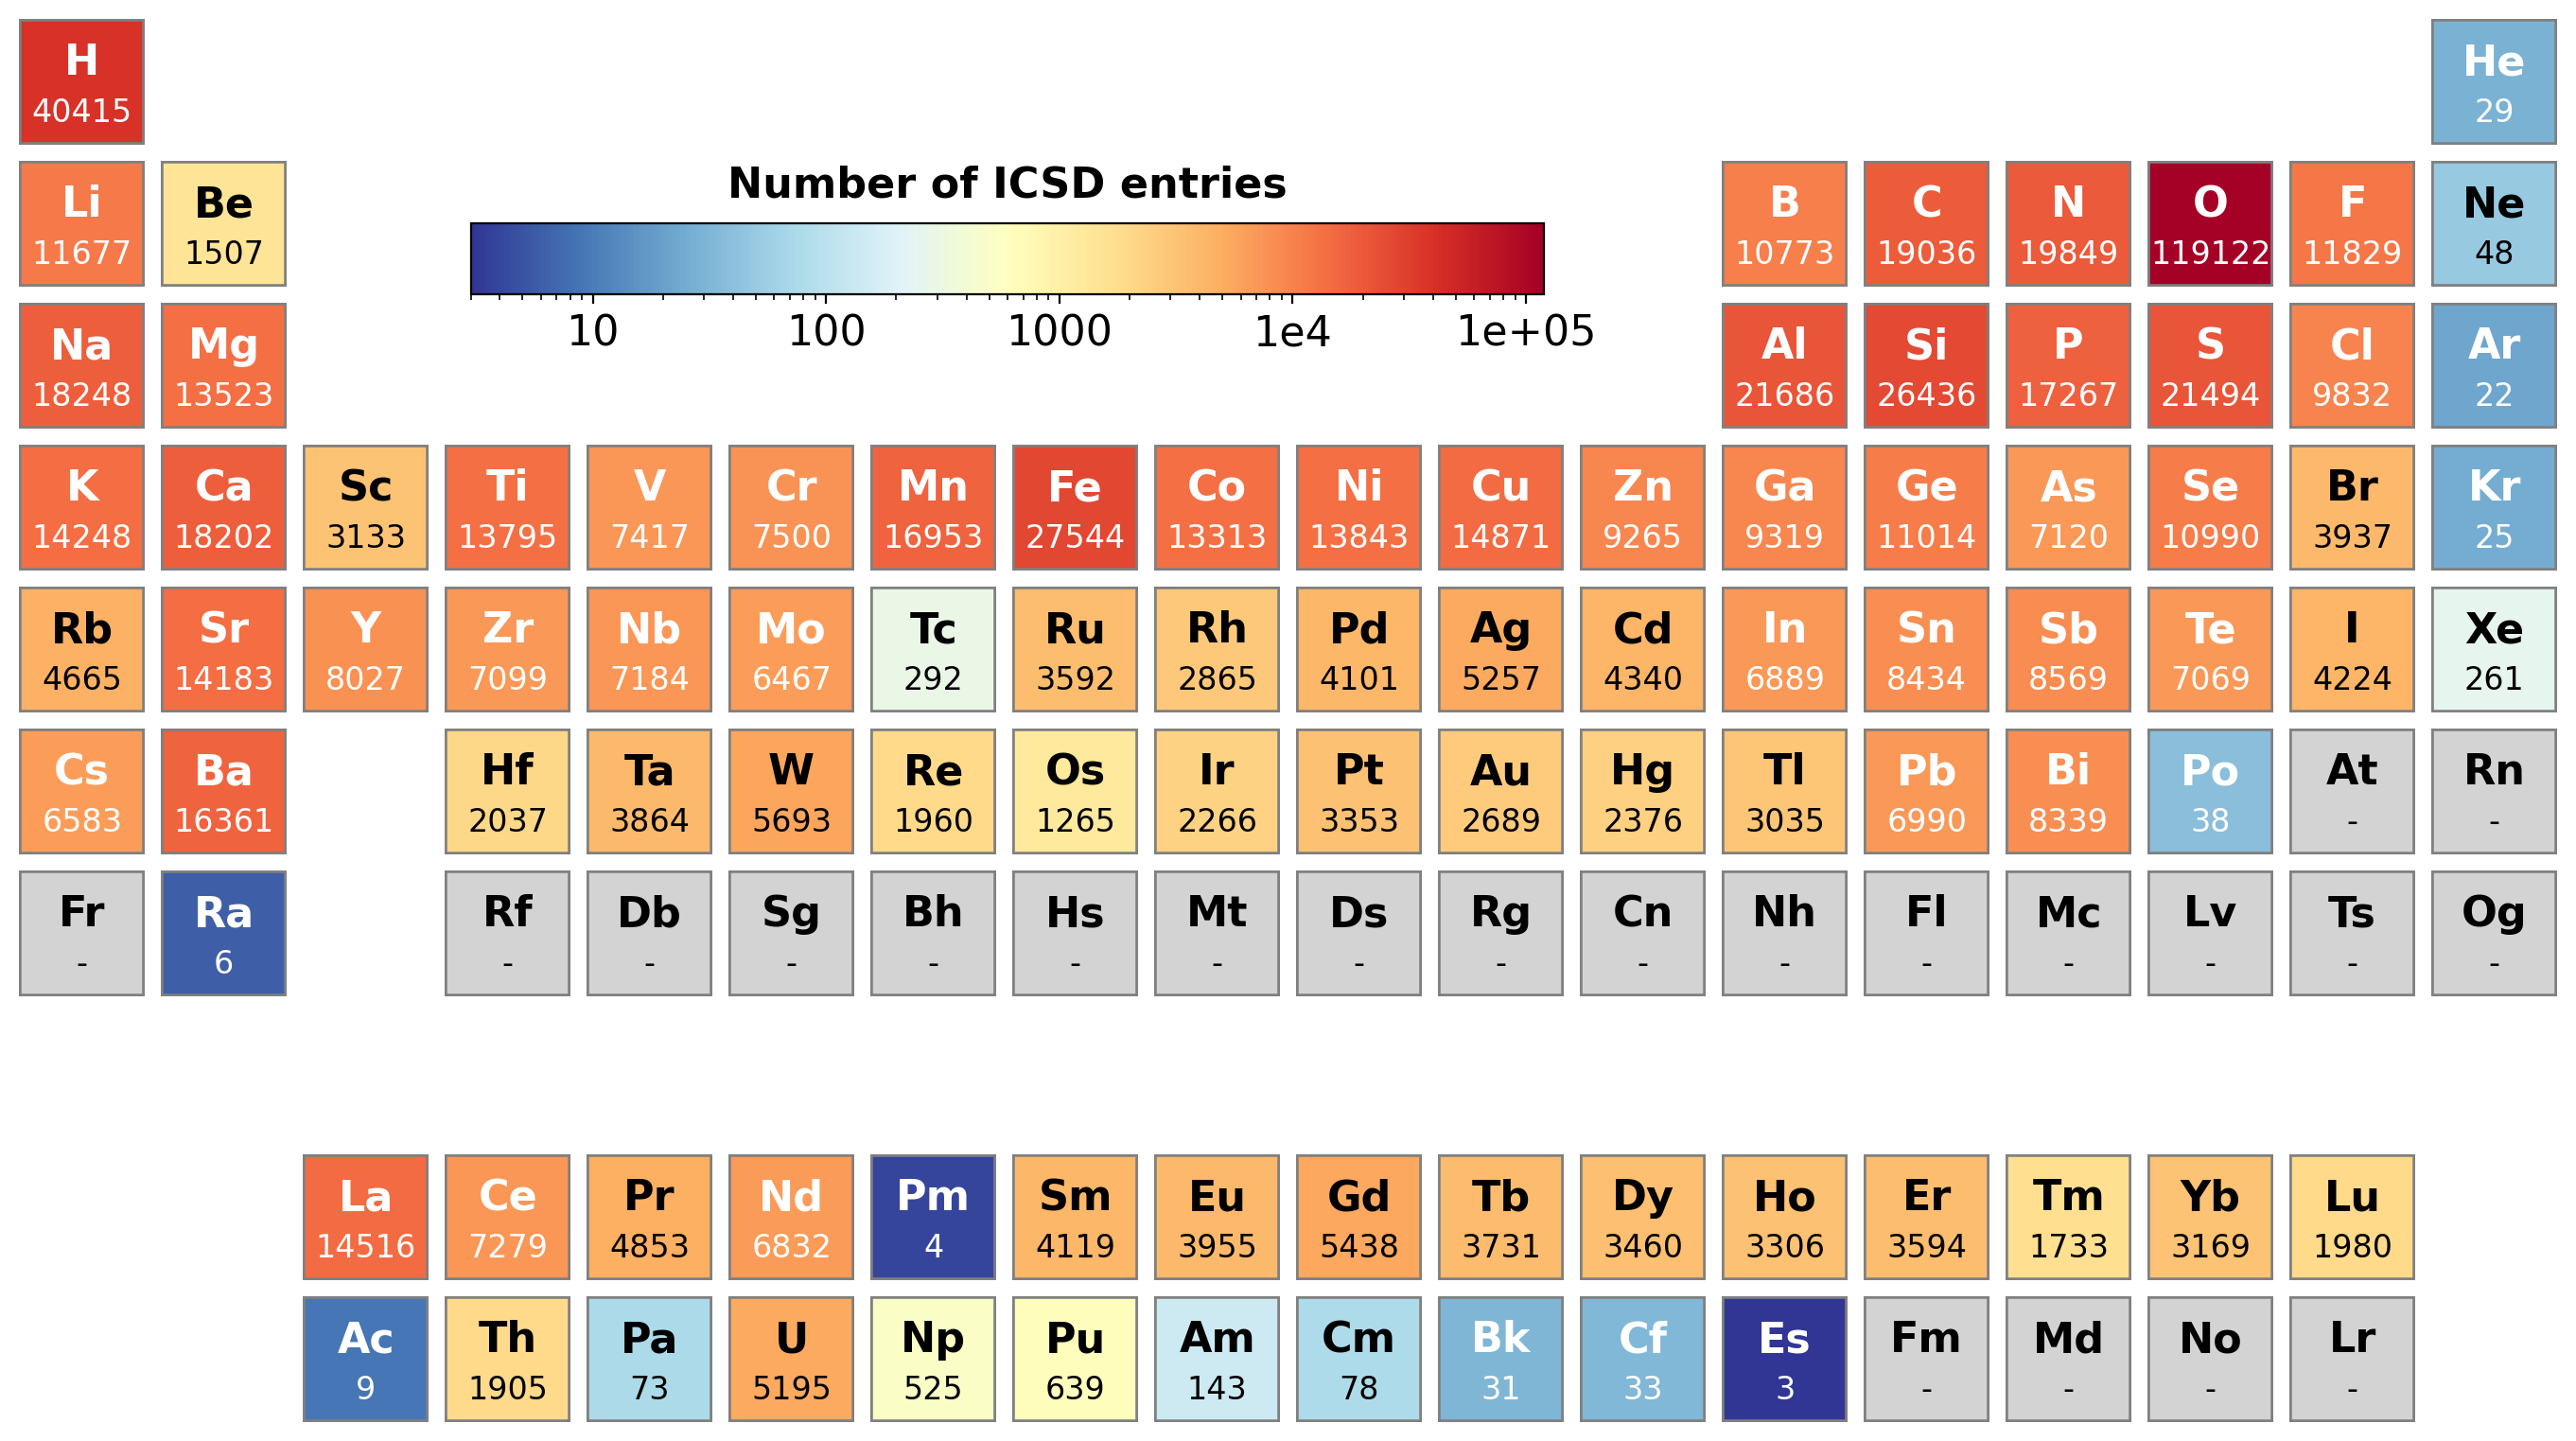

In [5]:
# Create a periodic table heatmap
pmv.ptable_heatmap(
    count_df, log=True, cbar_title="Number of ICSD entries", colormap="RdYlBu_r"
)

In [ ]:
help(ox_filter.filter)

In [14]:
help(ox_filter.get_species_occurrences_df)

Help on method get_species_occurrences_df in module smact.utils.oxidation:

get_species_occurrences_df(consensus: 'int' = 3, include_one_oxidation_state: 'bool' = False, sort_by_occurrences: 'bool' = True, include_zero: 'bool' = False) method of smact.utils.oxidation.ICSD24OxStatesFilter instance
    Get the ICSD 24 oxidation states list as a dataframe of species with their occurrences.
    
    Args:
        consensus (int): Minimum number of occurrences in literature for an ion to be considered valid. Default is 3.
        include_one_oxidation_state (bool): Include oxidation states +1 and -1 in the species or include as + and - signs. Default is False.
        sort_by_occurrences (bool): Sort the species list by occurrences. Default is True.
        include_zero (bool): Include oxidation state of zero in the filtered list. Default is False.
    
    Returns:
        dataframe: The species list as a dataframe of species with their occurrences.



In [16]:
df = ox_filter.get_species_occurrences_df(consensus=0, include_zero=True)
df

,element,species,results_count,species_proportion (%)
0,O,O2-,116910,98.143080
1,H,H+,34232,84.701225
2,Si,Si4+,18248,69.027084
3,Na,Na+,17539,96.114643
4,Ca,Ca2+,16605,91.226239
...,...,...,...,...
1849,Nb,Nb8+,0,0.000000
1850,Nb,Nb7+,0,0.000000
1851,Nb,Nb-,0,0.000000
1852,Nb,Nb2-,0,0.000000


In [6]:
total_dict = {}

for t in range(0, 101, 10):
    df = ox_filter.get_species_occurrences_df(consensus=0, include_zero=True)
    mask = df["species_proportion (%)"] > t
    filtered_df = df[mask][["element", "results_count"]]
    total_value = filtered_df["results_count"].sum()
    total_dict[t] = total_value / 1000

print(total_dict)

{0: 812.258, 10: 759.838, 20: 721.821, 30: 652.794, 40: 589.108, 50: 515.247, 60: 459.421, 70: 377.915, 80: 289.342, 90: 234.584, 100: 0.0}


In [12]:
total_dict_con3 = {}

for t in range(0, 101, 10):
    df = ox_filter.get_species_occurrences_df(consensus=3, include_zero=True)
    mask = df["species_proportion (%)"] > t
    filtered_df = df[mask][["element", "results_count"]]
    total_value = filtered_df["results_count"].sum()
    total_dict_con3[t] = total_value / 1000

print(total_dict_con3)

{0: 812.146, 10: 759.834, 20: 721.818, 30: 652.794, 40: 589.12, 50: 515.286, 60: 459.421, 70: 377.915, 80: 289.382, 90: 234.599, 100: 0.0}


/var/folders/gb/3q75byln3gz8710dqhxnnyr80000gp/T/ipykernel_32556/730221934.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


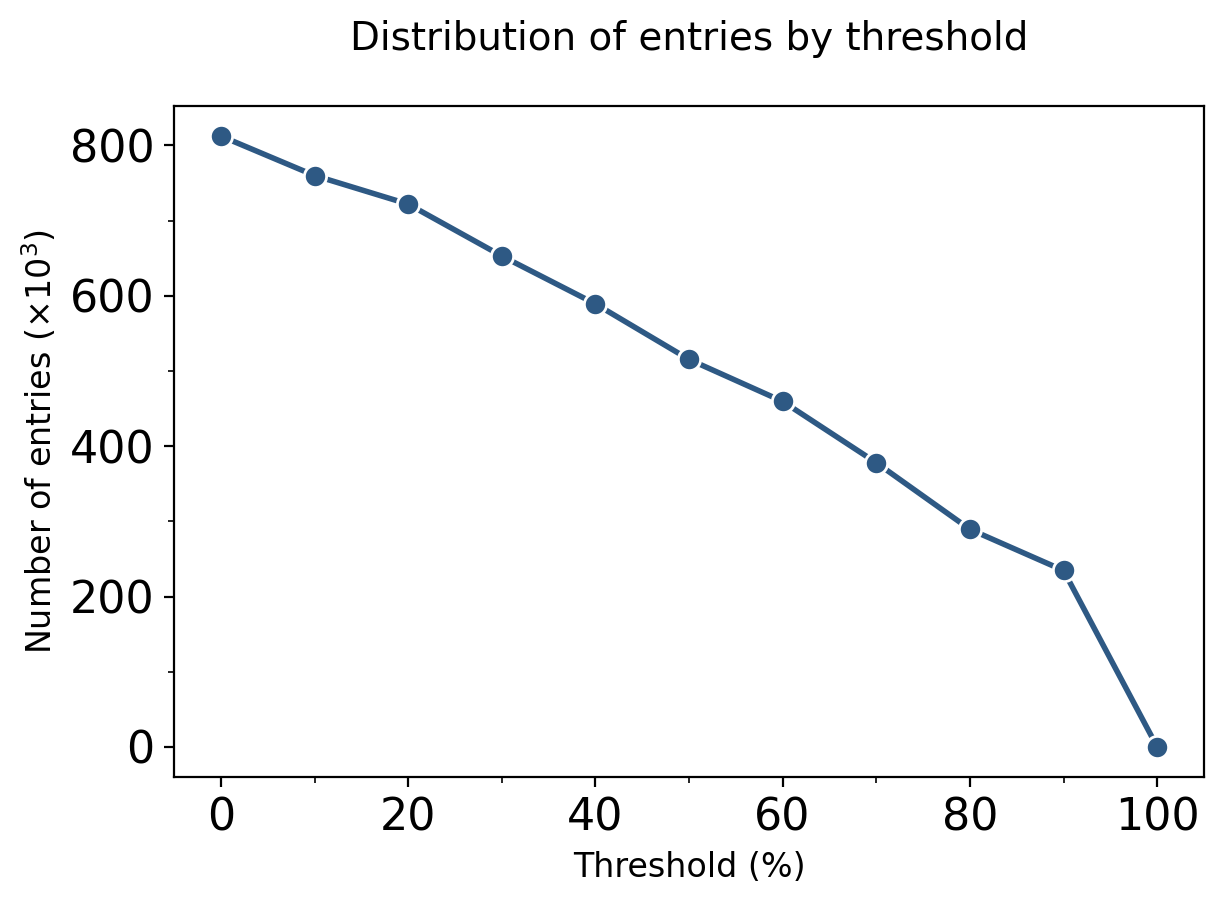

In [29]:
fig, ax = plt.subplots()

ax.plot(
    total_dict.keys(),
    total_dict.values(),
    marker="o",  # Add markers
    markersize=8,  # Marker size
    linewidth=2,  # Line thickness
    color="#2E5984",  # Professional blue color
    markeredgecolor="white",  # White edge around markers
    markeredgewidth=1,
)


ax.set_xlabel("Threshold (%)", fontsize=12)
ax.set_ylabel(r"""Number of entries ($\times 10^3$)""", fontsize=12)
ax.set_title("Distribution of entries by threshold", fontsize=14, pad=20)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.tight_layout()
plt.show()

KeyError: 'element'

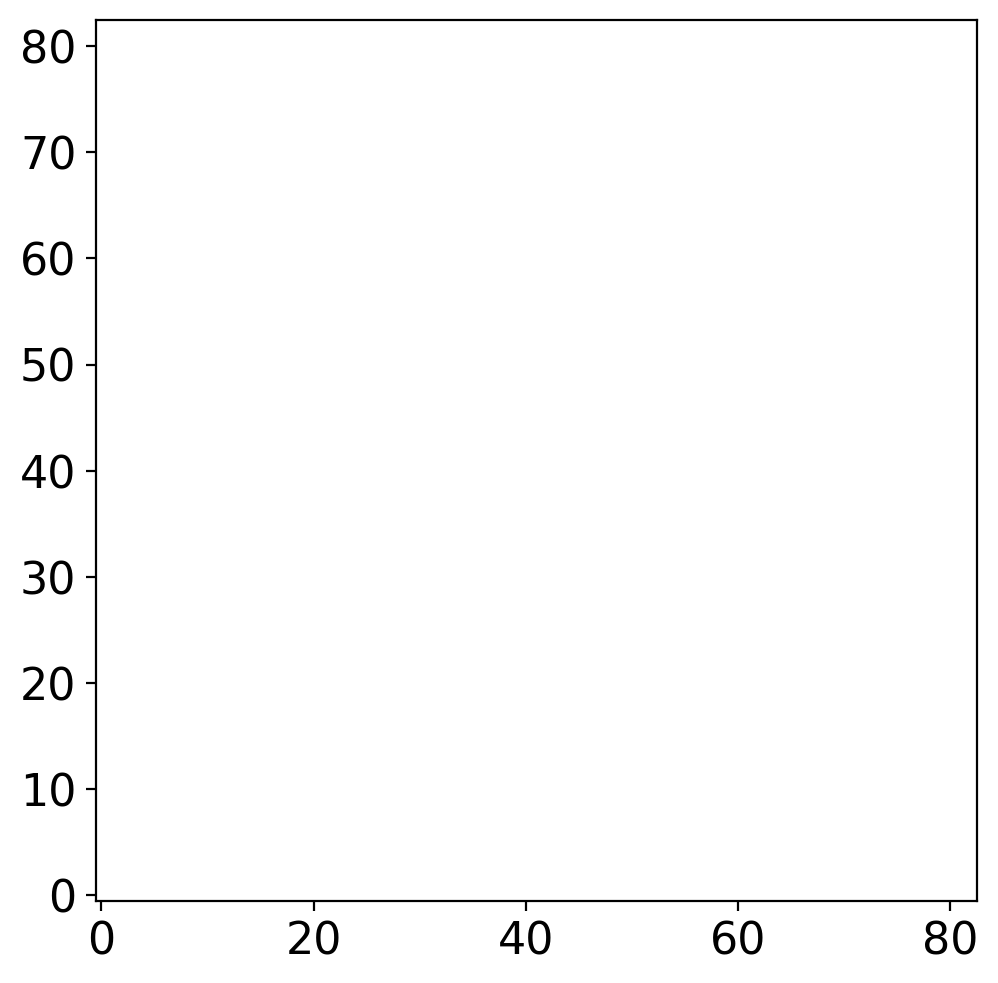

In [8]:
# Create a colormap
colormap = plt.cm.magma
# Diagonal line
x_diagonal = np.linspace(-10, 100, 10)
y_diagonal = x_diagonal
# Plot
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim([-0.5, 82.5])
ax.set_ylim([-0.5, 82.5])
# Create x- and y-axis sorting by atomic number/group
ax.plot(count_df["element"], np.arange(100), "-", linewidth=0)
# Create diagonal line
ax.plot(x_diagonal, y_diagonal, "--", color="black", linewidth=1, alpha=0.2)
# Plot the square plot, where c is the ehull value (you can change this to number of occurence for each combination)
img = ax.scatter(
    np.arange(100),
    np.arange(100),
    marker="s",
    s=25,
    c=np.arange(100),
    cmap=colormap,
)
# Plot experimental data (square plot with only edge)
ax.scatter(
    np.arange(100),
    np.arange(100),
    marker="s",
    facecolor="None",
    edgecolor="r",
    s=25,
    label="MP+ICSD",
)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=11, markerscale=2)
ax.set_title(
    f"Ehull Landscape (< {3} eV) for Normal Oxide Spinels (by group)",
    fontsize=11,
)
# Create x and y tick labels
ax.set_xticks(np.arange(100), np.arange(100), fontsize=11)
ax.set_yticks(np.arange(100), np.arange(100), fontsize=11)
ax.set_xlabel("A", fontsize=11)
ax.set_ylabel("B", fontsize=11)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(which="minor", linestyle="--", linewidth=0.5)
cbar = fig.colorbar(img, ax=ax, orientation="vertical")
cbar.ax.set_position([0.783, 0.195, 1, 0.6])
cbar.set_label("Ehull", fontsize=11, labelpad=20)
txt_pos_x = 95
txt_pos_y = 72.7

In [ ]:
df_elements_wnoble = pd.read_csv(
    "/home/e05/e05/pdetrat/work/2_MACE_spinels/1_MACE_and_VASP/MACE/1_generating_compositions/elements_by_group_wnoble.csv",
    header=None,
)
list_elements_wnoble = df_elements_wnoble[0].values.tolist()
x_label = []
y_label = []
x_newline = "\n"
y_space = "     "
for i in range(len(list_elements_wnoble)):
    if i % 2 == 0:
        x_label.append(list_elements_wnoble[i])
        y_label.append(list_elements_wnoble[i])
    else:
        x_label.append(x_newline + list_elements_wnoble[i])
        y_label.append(list_elements_wnoble[i] + y_space)